In [1]:
import pandas as pd
import importlib

In [2]:
import run_cmsopen
from pytorch_inferno.data import *

In [72]:
importlib.reload(run_cmsopen)

<module 'run_cmsopen' from '/home/centos/dev/pytorch_inferno/experiments/run_cmsopen.py'>

## Load data

In [73]:
#features = ['ht', 'aplanarity', 'sphericity', 'chargeEta', 'MET_met', 'deltaPhiTauMet', 'mt', 'mTauJet']
features = ['aplanarity', 'chargeEta', 'MET_met', 'deltaPhiTauMet']
shape_syst = ["jes"]
weight_syst = ["btag_weight1"]
use_weights = False

# Parameters for INFERNO training
inferno_args = {}
# Signal and bkg
inferno_args["b_true"] = 2800
inferno_args["mu_true"] = 400
# Number of shape nuisances
inferno_args["n_shape_alphas"] = 2
# Constraints on the nuisance parameters - typically should be N(0,1) if +-1sigma templates are provided
inferno_args["shape_aux"] = None
# Uncertainties on signal norm - should be Normal(0,s) with s in absolute event numbers
inferno_args["s_norm_aux"] = None
# Boolean whether to let the background float
inferno_args["nonaux_b_norm"] = False

train_args = {}
train_args["lr"] = 1e-3
train_args["n_feats"] = 4
train_args["neurons"] = 100
train_args["bins"] = 10
train_args["temperature"] = 0.1
train_args["weights"] = False

['MET_met_jes_up', 'event_jes_up', 'run_jes_up', 'luminosityBlock_jes_up', 'HLT_QuadJet40_IsoPFTau40_jes_up', 'HLT_QuadJet45_IsoPFTau45_jes_up', 'PV_npvs_jes_up', 'genEvent_tmeme_jes_up', 'norm_jes_up', 'norm_up_jes_up', 'norm_down_jes_up', 'trigger_weight_jes_up', 'trigger_weight_up_jes_up', 'trigger_weight_down_jes_up', 'trigger_is40_jes_up', 'isSignal_jes_up', 'isBkg_jes_up', 'btag_weight1_jes_up', 'btag_weight1_up_jes_up', 'btag_weight1_down_jes_up', 'btag_weight2_jes_up', 'btag_weight2_up_jes_up', 'btag_weight2_down_jes_up', 'h_jes_up', 'ht_jes_up', 'h_jet_jes_up', 'ht_jet_jes_up', 'chargeEta_jes_up', 'met_jes_up', 'mTauJet_jes_up', 'mt_jes_up', 'deltaPhiTauMet_jes_up', 'nJets_jes_up', 'aplanarity_jes_up', 'sphericity_jes_up', 'bdt_jes_up', 'event_id']
['MET_met_jes_down', 'event_jes_down', 'run_jes_down', 'luminosityBlock_jes_down', 'HLT_QuadJet40_IsoPFTau40_jes_down', 'HLT_QuadJet45_IsoPFTau45_jes_down', 'PV_npvs_jes_down', 'genEvent_tmeme_jes_down', 'norm_jes_down', 'norm_up_je

1: Train=1998.9803588867187 Valid=1547.0145152698863
2: Train=1455.7092407226562 Valid=1335.3271061290395


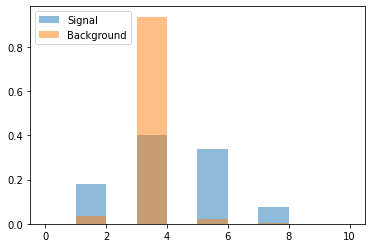

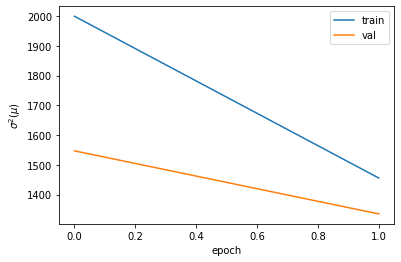

In [74]:
OUTPATH = "/home/centos/data/inferno_cmsopen7"
trn_dl, val_dl, test_dl, samples, model = run_cmsopen.train(OUTPATH, features = features, 
                                                            shape_syst = shape_syst,
                                                            weight_syst = weight_syst,
                                                            epochs=2, bs=500, n_sig=5000, 
                                                            inferno_args = inferno_args, 
                                                            train_args = train_args,
                                                            use_weights = use_weights,
                                                            store=False)